In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_red = pd.DataFrame({'width':[0.3, 0.9, 0.2, 0.4, 0.6],
                        'length':[0.7, 0.2, 0.5, 0.2, 0.3],
                        'color':['red'] * 5})
df_purple = pd.DataFrame({'width':[1.0, 0.8, 1.2, 0.6, 1.3],
                        'length':[0.9, 0.6, 0.5, 0.8, 0.7],
                        'color':['purple'] * 5})
df = pd.concat((df_red, df_purple))

In [3]:
df

,color,length,width
0,red,0.7,0.3
1,red,0.2,0.9
2,red,0.5,0.2
3,red,0.2,0.4
4,red,0.3,0.6
0,purple,0.9,1.0
1,purple,0.6,0.8
2,purple,0.5,1.2
3,purple,0.8,0.6
4,purple,0.7,1.3


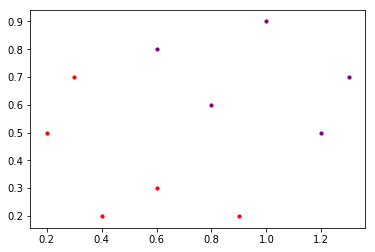

In [4]:
plt.scatter(df[df['color'] == 'red']['width'],
            df[df['color'] == 'red']['length'],
            color='red', s=10)
plt.scatter(df[df['color'] == 'purple']['width'],
            df[df['color'] == 'purple']['length'],
            color='purple', s=10)
plt.show()

In [5]:
color = df['color'].unique()
# y = df.values[:, 0]
y =  np.array(list(map(lambda x: 0 if x == 'red' else 1,
                        df.values[:, 0])))   
x = df.values[:, 1:].astype(np.float32)
bias = np.ones((df.shape[0], 1))
x = np.concatenate((x, bias), 1)

In [6]:
def softmax(predict):
    # softm = np.exp(predict) / np.sum(np.exp(predict))
    softmax = np.power(np.e, predict) / np.sum(np.power(np.e, predict))
    return softmax

def sigmoid(predict):
    # sigmoid = 1 / (1 + np.power(np.e, -predict))
    sigmoid = 1 / (1 + np.exp(-predict))
    return sigmoid

# def log_loss(y, predict):
#     log_loss = -np.sum(y * np.log(predict) +
#                         (1 - y) * np.log(1 - predict)) / y.size

def loss_log(y, predict):
    loss_log = -np.mean(y * np.log(predict) +
                        (1 - y) * np.log(1 - predict))
    return loss_log

In [7]:
weight = np.random.random(x.shape[1])

delta = np.zeros(weight.size, np.float32)
alpha = np.array([0.1] * weight.size, np.float32)

epochs = 100
error = np.zeros(epochs, np.float32)
for j in range(epochs):
    predict = sigmoid(x @ weight)
    error[j] = loss_log(y, predict)

    for i in range(x.shape[0]):
        predict = sigmoid(x[i] @ weight)
        # delta = delta + (predict - y[i]) * x[i]
        delta += (predict - y[i]) * x[i]

    weight = weight - (delta * alpha)

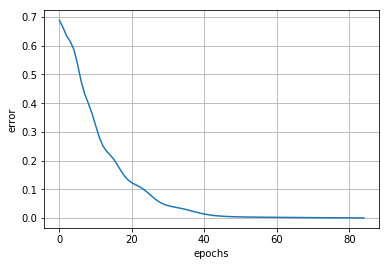

In [8]:

plt.plot(range(epochs), error)
plt.xlabel('epochs')
plt.ylabel('error')
plt.grid()
plt.show()

In [9]:
x[0].min()

0.30000001192092896

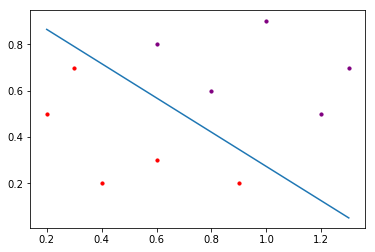

In [10]:
plt.scatter(df[df['color'] == 'red']['width'],
            df[df['color'] == 'red']['length'],
            color='red', s=10)
plt.scatter(df[df['color'] == 'purple']['width'],
            df[df['color'] == 'purple']['length'],
            color='purple', s=10)

divider_x = np.array([x[:, 1].min(), x[:, 1].max()])
# divider_x = np.array([df['width']])
# # line_y = (-divider_x * weight[0] - weight[2]) / weight[1]
divider_y = -(divider_x * weight[1] + weight[2]) / weight[0]
# # divider_y
plt.plot(divider_x, divider_y)
plt.show()

In [11]:
weight = np.random.random((x.shape[1], color.size))
delta = np.zeros(color.size)
alpha = np.array([0.01] * color.size)
epochs = 100
for j in range(epochs):
    for i in range(x.shape[0]):
        predict = softmax(x[i] @ weight)
        # predict = sigma(x[i] @ weight)
        # predict = softmax(sigma(x[i] @ weight))
        teacher = np.array(list(map(lambda x: 1 if x == y[i] else 0, color)))
        delta = delta + (predict - teacher)
    
    # weight = weight - delta
    weight = weight - (delta * alpha)
    delta[:] = 0


In [12]:
# weight = np.array([[20, 17], [10, 22], [-350, -500]])
weight = weight.astype(np.float32)  
weight

array([[-4.05739  , -4.6048393],
       [-4.390608 , -4.4417105],
       [-4.6849813, -4.352024 ]], dtype=float32)

In [13]:
divider = np.linalg.solve(weight.T[:, :-1], -weight.T[:, -1])

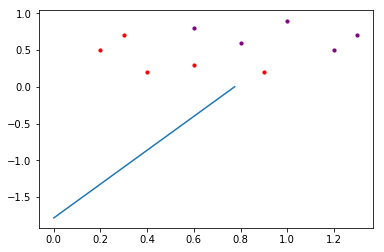

In [14]:
plt.scatter(df[df['color'] == 'red']['width'],
            df[df['color'] == 'red']['length'],
            color='red', s=10)
plt.scatter(df[df['color'] == 'purple']['width'],
            df[df['color'] == 'purple']['length'],
            color='purple', s=10)
plt.plot((0, divider[0]), (divider[1], 0))
plt.show()

In [15]:
# w = np.array([[20, 10, -350], [17, 22, -500]])
# w
w = np.array([[20, 17], [10, 22], [-350, -500]])
w

array([[  20,   17],
       [  10,   22],
       [-350, -500]])

In [16]:
# A = w[:, :-1]
# B = -w[:, -1] 
# X = np.linalg.solve(A, B)
divider = np.linalg.solve(w.T[:, :-1], -w.T[:, -1])

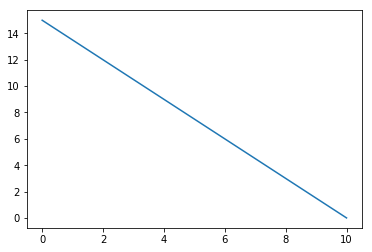

In [17]:
plt.plot((0, divider[0]),(divider[1], 0))
plt.show()